In [1]:
import scipy.spatial
import pysal as ps
import numpy as np
from pointpattern import PointPattern
from window import as_window
%matplotlib inline
import matplotlib.pyplot as plt
from distance_statistics import g, g_envelopes, f, f_envelopes, j, j_envelopes

In [2]:
points = [[66.22, 32.54], [22.52, 22.39], [31.01, 81.21], [9.47, 31.02],
               [30.78, 60.10], [75.21, 58.93], [79.26,  7.68], [8.23, 39.93],
               [98.73, 80.53], [89.78, 42.53], [65.19, 92.08], [54.46, 8.48]]
p1 = PointPattern(points)

In [3]:
p1.summary()

Point Pattern
12 points
Bounding rectangle [(8.23,7.68), (98.73,92.08)]
Area of window: 7638.2
Intensity estimate for window: 0.00157105077112


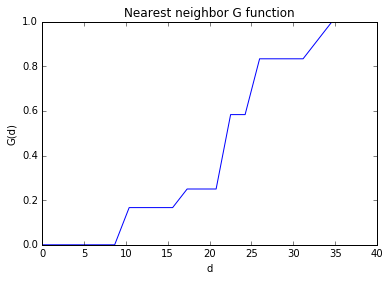

In [4]:
gp1 = g(p1, intervals=20)
plt.plot(gp1[:,0], gp1[:,1])
plt.title("Nearest neighbor G function")
plt.ylabel("G(d)")
plt.xlabel("d")

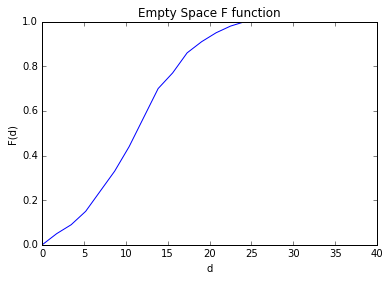

In [5]:
fp1 = f(p1, intervals=20)
plt.plot(fp1[:,0], fp1[:,1])
plt.title("Empty Space F function")
plt.ylabel("F(d)")
plt.xlabel("d")

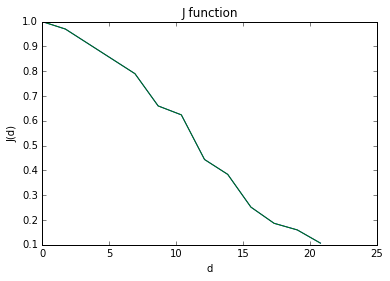

In [6]:
jp1 = j(p1, intervals=20)
plt.plot(jp1[:,0], jp1[:,1])
plt.title("J function")
plt.ylabel("J(d)")
plt.xlabel("d")
plt.plot(jp1[:,0], jp1[:,1])

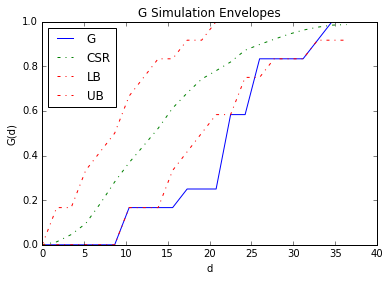

In [7]:
sim = g_envelopes(p1, intervals=20, reps=100)
gs, x, fobs, mean, low, high = sim
plt.plot(x, fobs, label='G')
plt.plot(x, mean, 'g-.', label='CSR')
plt.plot(x, low, 'r-.', label='LB')
plt.plot(x, high, 'r-.', label="UB")
plt.ylabel("G(d)")
plt.xlabel('d')
plt.title('G Simulation Envelopes')
plt.legend(loc=0)

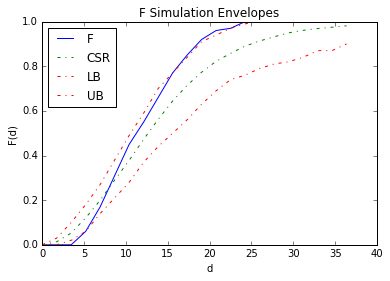

In [8]:
sim = f_envelopes(p1, intervals=20, reps=100)
fs, x, fobs, mean, low, high = sim
plt.plot(x, fobs, label='F')
plt.plot(x, mean, 'g-.', label='CSR')
plt.plot(x, low, 'r-.', label='LB')
plt.plot(x, high, 'r-.', label="UB")
plt.ylabel("F(d)")
plt.xlabel('d')
plt.title('F Simulation Envelopes')
plt.legend(loc=0)

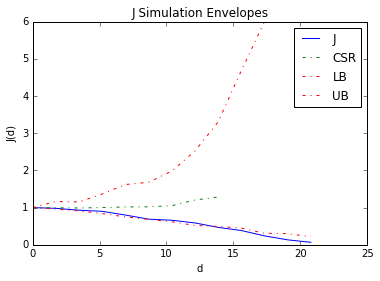

In [10]:
sim = j_envelopes(p1, intervals=20, reps=100)
js, x, jobs, mean, low, high = sim
plt.plot(x, jobs, label='J')
plt.plot(x, mean, 'g-.', label='CSR')
plt.plot(x, low, 'r-.', label='LB')
plt.plot(x, high, 'r-.', label="UB")
plt.ylabel("J(d)")
plt.xlabel('d')
plt.title('J Simulation Envelopes')
plt.legend(loc=0)

In [11]:
from pysal.contrib import shapely_ext
va = ps.open(ps.examples.get_path("virginia.shp"))
polys = [shp for shp in va]
vapnts = ps.open(ps.examples.get_path("vapoints.shp"))
points = [shp for shp in vapnts]
state = shapely_ext.cascaded_union(polys)

In [12]:
vpp = PointPattern(vapnts)

In [13]:
gvpp = g(vpp)

In [14]:
gvpp

array([[ 0.        ,  0.        ],
       [ 0.03432156,  0.13      ],
       [ 0.06864312,  0.4025    ],
       [ 0.10296468,  0.6875    ],
       [ 0.13728624,  0.845     ],
       [ 0.1716078 ,  0.94      ],
       [ 0.20592936,  0.9825    ],
       [ 0.24025092,  0.99      ],
       [ 0.27457248,  0.995     ],
       [ 0.30889404,  0.9975    ],
       [ 0.34321561,  1.        ],
       [ 0.37753717,  1.        ]])

In [15]:
gevpp = g_envelopes(vpp)

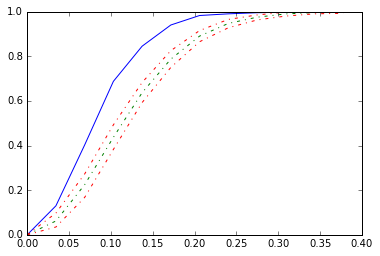

In [16]:
gs, x, gobs, mean, low, high = gevpp
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')

In [17]:
vppw = PointPattern(vapnts, window = as_window(state))

In [ ]:
gevppw = g_envelopes(vppw)

In [ ]:
gs, x, gobs, mean, low, high = gevppw
plt.plot(x, gobs)
plt.plot(x, mean, 'g-.')
plt.plot(x, low, 'r-.')
plt.plot(x, high, 'r-.')